In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
class Individual(object):
    
    def __init__(self,Chromosome=0,Fitness=0):
        self.Chromosome=Chromosome
        self.Fitness=Fitness
    
    def Create(self,dim,R):   # create chromosome of dim elements in the range of a and b
        self.Chromosome=np.empty([1,dim])
        for i in range(0,dim):
            self.Chromosome[0,i]=(R[i,1]-R[i,0])*np.random.rand()+R[i,0]
    
    def Crossover(self,other):
        child1=Individual()
        child2=Individual()
        alpha=np.random.rand()
        child1.Chromosome=(alpha)*(self.Chromosome)+(1-alpha)*(other.Chromosome)
        child2.Chromosome=(1-alpha)*(self.Chromosome)+(alpha)*(other.Chromosome)
        return child1, child2, alpha
        
    
    def Mutation(self,R):
        mutant=self
        d=random.randint(0,dim-1)
        #d=np.random.random_integers(0,dim-1)  #dim_of_mutation=
        mut_range=0.1*(R[d,1]-R[d,0])
        self.Chromosome[0,d]= max(R[d,0]  , min (R[d,1], self.Chromosome[0,d]+mut_range*(np.random.rand()-0.5) )  )
        #self.Chromosome[0,d]= self.Chromosome[0,d]+mut_range*(np.random.rand()-0.5)
        return self 
    
    def Dissimilarity(self,other):
        return np.linalg.norm(self.Chromosome-other.Chromosome)
    
    
    def __str__(self):
        return str((self.Chromosome,self.Fitness))
    
def FunctionEvaluation(f,ListOfVars,ListOfVals):
        Dim=len(ListOfVars)
        for i in range(0,Dim):
            f=f.subs({ListOfVars[i]:ListOfVals[i]})
        return f
    

In [24]:
import numpy as np
import sympy
import random

#s = str('x1**2+sin(x2)')
#ListOfVars=['x1','x2']
#f = sympy.sympify(s)
#Function='x1^2*sin(x2)+cos(x3)'
#ListOfVars=['x1','x2','x3']
#R=np.array([[1,5],[0,1],[0,2]])
#NumGen=500
#PopSize=20

Function='x1^2'
ListOfVars=['x1']
R=np.array([[-1,1]])
NumGen=5000
PopSize=50

In [25]:
s=str(Function)
f=sympy.sympify(s)
dim=len(ListOfVars)

Population=[]

Fitness=np.empty(shape=[1, PopSize]) 
MinFit=np.empty(shape=[1, NumGen])
MaxFit=np.empty(shape=[1, NumGen])
AverageFit=np.empty(shape=[1, NumGen])
S=0
    
for i in range(0,PopSize):
    p=Individual()
    p.Create(dim,R)
    Population.append(p)  #.Chromosome

    ListofVals=p.Chromosome[0]
    Fitness[0,i]=FunctionEvaluation(f,ListOfVars,np.ndarray.tolist(ListofVals))
    
print(Fitness)

    

    
#for i in range(0,PopSize):
    #print(Population[i].Chromosome)
    
for n in range(0,NumGen):
    
    

    
    index1=random.randint(0,PopSize-1)
    index2=random.randint(0,PopSize-1)
       
    parent1=Population[index1]
    parent2=Population[index2]
    
    fitness_parent1=Fitness[0,index1]
    fitness_parent2=Fitness[0,index2]
    
    child1, child2 , alpha = parent1.Crossover(parent2)
    
    child1=child1.Mutation(R)
    child2=child2.Mutation(R)
    
   
    ListofVals=child1.Chromosome[0]
    fitness_child1=FunctionEvaluation(f,ListOfVars,np.ndarray.tolist(ListofVals))
    ListofVals=child2.Chromosome[0]
    fitness_child2=FunctionEvaluation(f,ListOfVars,np.ndarray.tolist(ListofVals))
    
    
    #DC
    dp1c1=parent1.Dissimilarity(child1)
    dp1c2=parent1.Dissimilarity(child2)
    dp2c1=parent2.Dissimilarity(child1)
    dp2c2=parent2.Dissimilarity(child2)
    

    if (dp1c1+dp2c2)<=(dp1c2+dp2c1):
#----------------------------------
        if  fitness_child1<=fitness_parent1:
            Population[index1]=child1;
            Fitness[0,index1]=fitness_child1 
            S=S+1
        #else:
            # Do nothing
#----------------------------------           
        if  fitness_child2<=fitness_parent2:
            Population[index2]=child2;
            Fitness[0,index2]=fitness_child2 
            S=S+1
        #else:
            # Do nothing
            
    
    
    if (dp1c1+dp2c2)>(dp1c2+dp2c1):
#----------------------------------   
        if  fitness_child1<=fitness_parent2:
            Population[index2]=child1;
            Fitness[0,index2]=fitness_child1
            S=S+1
        #else:
            # Do nothing
            
#----------------------------------          
        if  fitness_child2<=fitness_parent1:
            Population[index1]=child2;
            Fitness[0,index1]=fitness_child2
            S=S+1
    
        #else:
        
    
    
    
    
    
    
    
    
    # Replace worse
    #index_worst=np.argsort(-Fitness)[0,0:2]
    
    #Population[index_worst[0]].Chromosome=child1.Chromosome
    #Fitness[0,index_worst[0]]=fitness_child1
    #Population[index_worst[1]].Chromosome=child2.Chromosome
    #Fitness[0,index_worst[1]]=fitness_child2
    
    MinFit[0,n]=np.min(Fitness)
    MaxFit[0,n]=np.max(Fitness)
    AverageFit[0,n]=np.average(Fitness)
    
    


[[  1.25649332e-03   6.53637197e-01   5.79323167e-01   1.58906730e-01
    3.00186228e-01   5.25904078e-04   3.71010183e-02   2.80027573e-02
    3.80661906e-01   1.09411611e-01   9.92829872e-01   3.83193414e-02
    5.44274336e-02   1.73525780e-01   1.20527072e-01   1.97302836e-01
    6.46182758e-03   4.14509463e-01   4.67757234e-01   7.35898574e-01
    4.10311593e-01   8.39932833e-01   5.38010692e-01   3.57890249e-01
    6.33867730e-02   3.98879694e-04   5.31594331e-02   6.13755258e-01
    6.94485480e-01   3.07813158e-02   4.22244219e-01   8.98069572e-01
    1.39877523e-01   4.07477298e-01   8.28405668e-01   7.72206486e-03
    6.35935233e-01   1.28761884e-01   1.32511419e-01   7.65753667e-01
    4.07768542e-01   9.78605188e-02   6.95272987e-01   4.14652879e-01
    7.47876461e-01   3.03622717e-01   2.21523731e-01   4.00735994e-01
    4.69583808e-01   1.74762069e-01]]


The minimim of function   x1**2  is  1.12921052609e-10 occured in   [1.0626431791029489e-05]


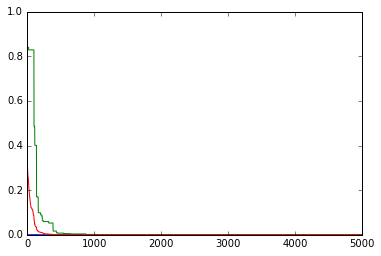

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0.0, NumGen, 1)

plt.plot(t,MinFit[0,:])
plt.plot(t,MaxFit[0,:])
plt.plot(t,AverageFit[0,:])

a=np.min(Fitness)
b=np.ndarray.tolist(Population[np.argmin(Fitness)].Chromosome[0])

print("The minimim of function  ", f, ' is ', a, 'occured in  ', b)

In [ ]:
S

In [ ]:
print(Fitness)

In [ ]:
[[  2.03801774e-03   4.30837763e-01   5.24388809e-01   9.83724458e-01
    1.41610181e-01   2.18727397e-01   1.40694851e-02   1.57722293e-01
    7.89549980e-01   3.21069703e-01   8.19871637e-01   1.23246452e-01
    2.70198222e-01   7.08383416e-02   4.12722893e-04   5.57405031e-01
    2.55302628e-02   1.82315653e-02   9.09644384e-02   9.92299693e-04
    8.44483989e-01   3.80570965e-01   9.99135151e-02   7.01911355e-01
    8.68281151e-01   6.12678927e-01   2.56491236e-02   2.63821369e-01
    7.02473517e-02   4.00037356e-01   1.19196341e-01   1.26846415e-01
    1.03158288e-01   3.59836600e-01   9.43380963e-02   4.67570973e-01
    7.08110376e-01   4.73630116e-02   1.72880367e-01   1.94433703e-02
    6.66711417e-02   3.28901698e-01   4.89125894e-01   7.23734891e-01
    7.27774983e-01   9.56942402e-01   4.92237715e-01   1.92674948e-01
    1.29277935e-01   4.29008126e-01]]


In [ ]:
parent2.Chromosome

In [ ]:
parent1.Chromosome

In [ ]:
child1.Chromosome

In [ ]:
for i in range(0,PopSize):
    print(Population[i].Chromosome)